In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Before starting the code run the "pip install ..." down that will allow xgboost, lightgbm work
#!pip install scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hrt_data = pd.read_csv('/content/heart_attack_south_africa.csv')


# Print the data informations
print(f'Dataset shape: {hrt_data.shape}')
print(hrt_data.info())

Dataset shape: (100000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patient_ID                    100000 non-null  int64  
 1   Age                           100000 non-null  int64  
 2   Gender                        100000 non-null  object 
 3   Cholesterol_Level             100000 non-null  int64  
 4   Blood_Pressure_Systolic       100000 non-null  int64  
 5   Blood_Pressure_Diastolic      100000 non-null  int64  
 6   Smoking_Status                100000 non-null  object 
 7   Alcohol_Intake                100000 non-null  object 
 8   Physical_Activity             100000 non-null  object 
 9   Obesity_Index                 100000 non-null  float64
 10  Diabetes_Status               100000 non-null  object 
 11  Family_History_Heart_Disease  100000 non-null  object 
 12  Diet_Quality     

In [ ]:
hrt_data.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


In [ ]:
hrt_data.describe()

,Patient_ID,Age,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Obesity_Index,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,56.929210,224.578740,144.317750,89.591950,29.004788,174.629860,124.333400,49.547090,0.587320
std,28867.657797,18.776713,43.316257,31.759636,17.277238,6.343317,72.118654,43.340624,17.350927,0.492319
min,1.000000,25.000000,150.000000,90.000000,60.000000,18.000000,50.000000,50.000000,20.000000,0.000000
25%,25000.750000,41.000000,187.000000,117.000000,75.000000,23.500000,112.000000,87.000000,35.000000,0.000000
50%,50000.500000,57.000000,225.000000,144.000000,90.000000,29.000000,175.000000,124.000000,50.000000,1.000000
75%,75000.250000,73.000000,262.000000,172.000000,105.000000,34.500000,237.000000,162.000000,65.000000,1.000000
max,100000.000000,89.000000,299.000000,199.000000,119.000000,40.000000,299.000000,199.000000,79.000000,1.000000


In [ ]:
# Check for missing values
missing_values = hrt_data.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')


Missing values in each column:
Patient_ID                      0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure_Systolic         0
Blood_Pressure_Diastolic        0
Smoking_Status                  0
Alcohol_Intake                  0
Physical_Activity               0
Obesity_Index                   0
Diabetes_Status                 0
Family_History_Heart_Disease    0
Diet_Quality                    0
Stress_Level                    0
Heart_Attack_History            0
Medication_Usage                0
Triglycerides_Level             0
LDL_Level                       0
HDL_Level                       0
Heart_Attack_Outcome            0
dtype: int64


In [ ]:
#Showing the unique objects for each column

objects_cat = hrt_data.select_dtypes(include= ['object']).columns

for object_cat in objects_cat :
  print(f"{object_cat}:\n {hrt_data[object_cat].unique()}\n")

Gender:
 ['Female' 'Male']

Smoking_Status:
 ['No' 'Yes']

Alcohol_Intake:
 ['High' 'Low' 'Moderate']

Physical_Activity:
 ['Sedentary' 'Highly Active' 'Active']

Diabetes_Status:
 ['No' 'Yes']

Family_History_Heart_Disease:
 ['No' 'Yes']

Diet_Quality:
 ['Good' 'Average' 'Poor']

Stress_Level:
 ['High' 'Medium' 'Low']

Heart_Attack_History:
 ['No' 'Yes']

Medication_Usage:
 ['No' 'Yes']



#Visualize the Data

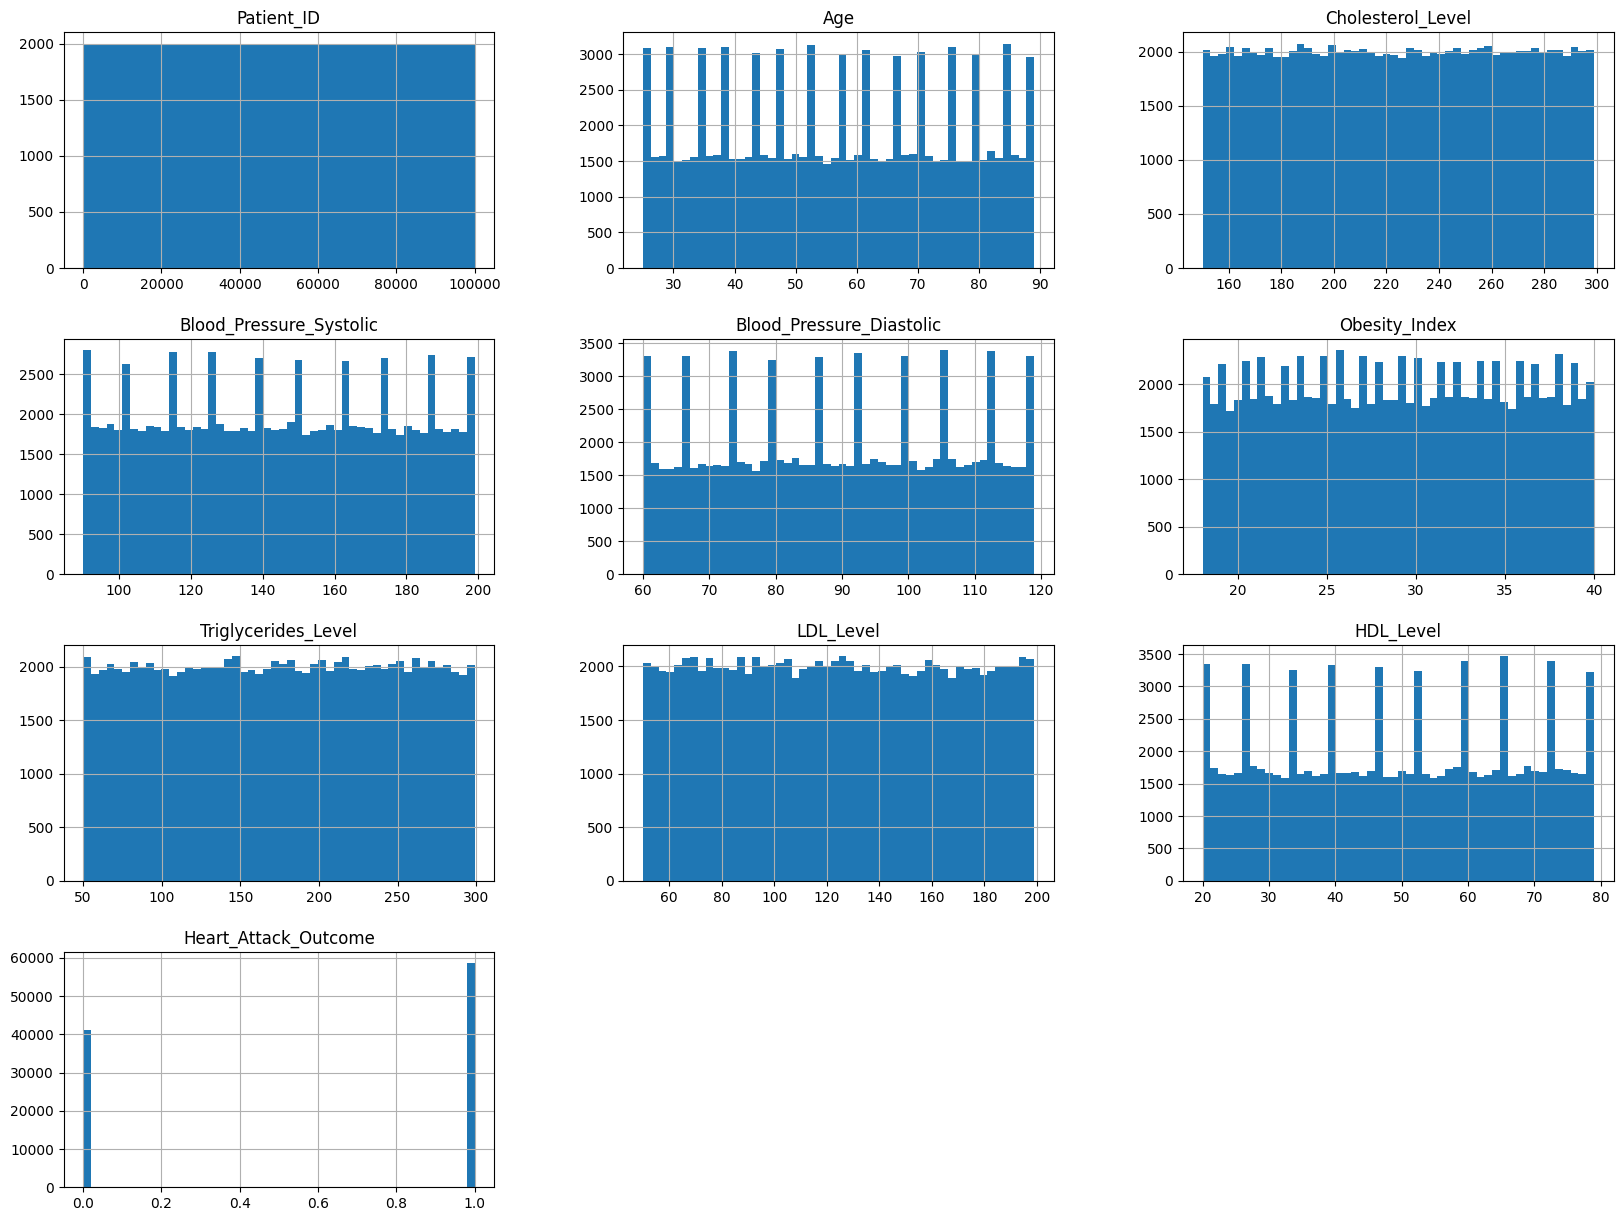

In [ ]:
#Plot the numerical data as hist
hrt_data.hist(bins=50, figsize=(20,15))
plt.show()

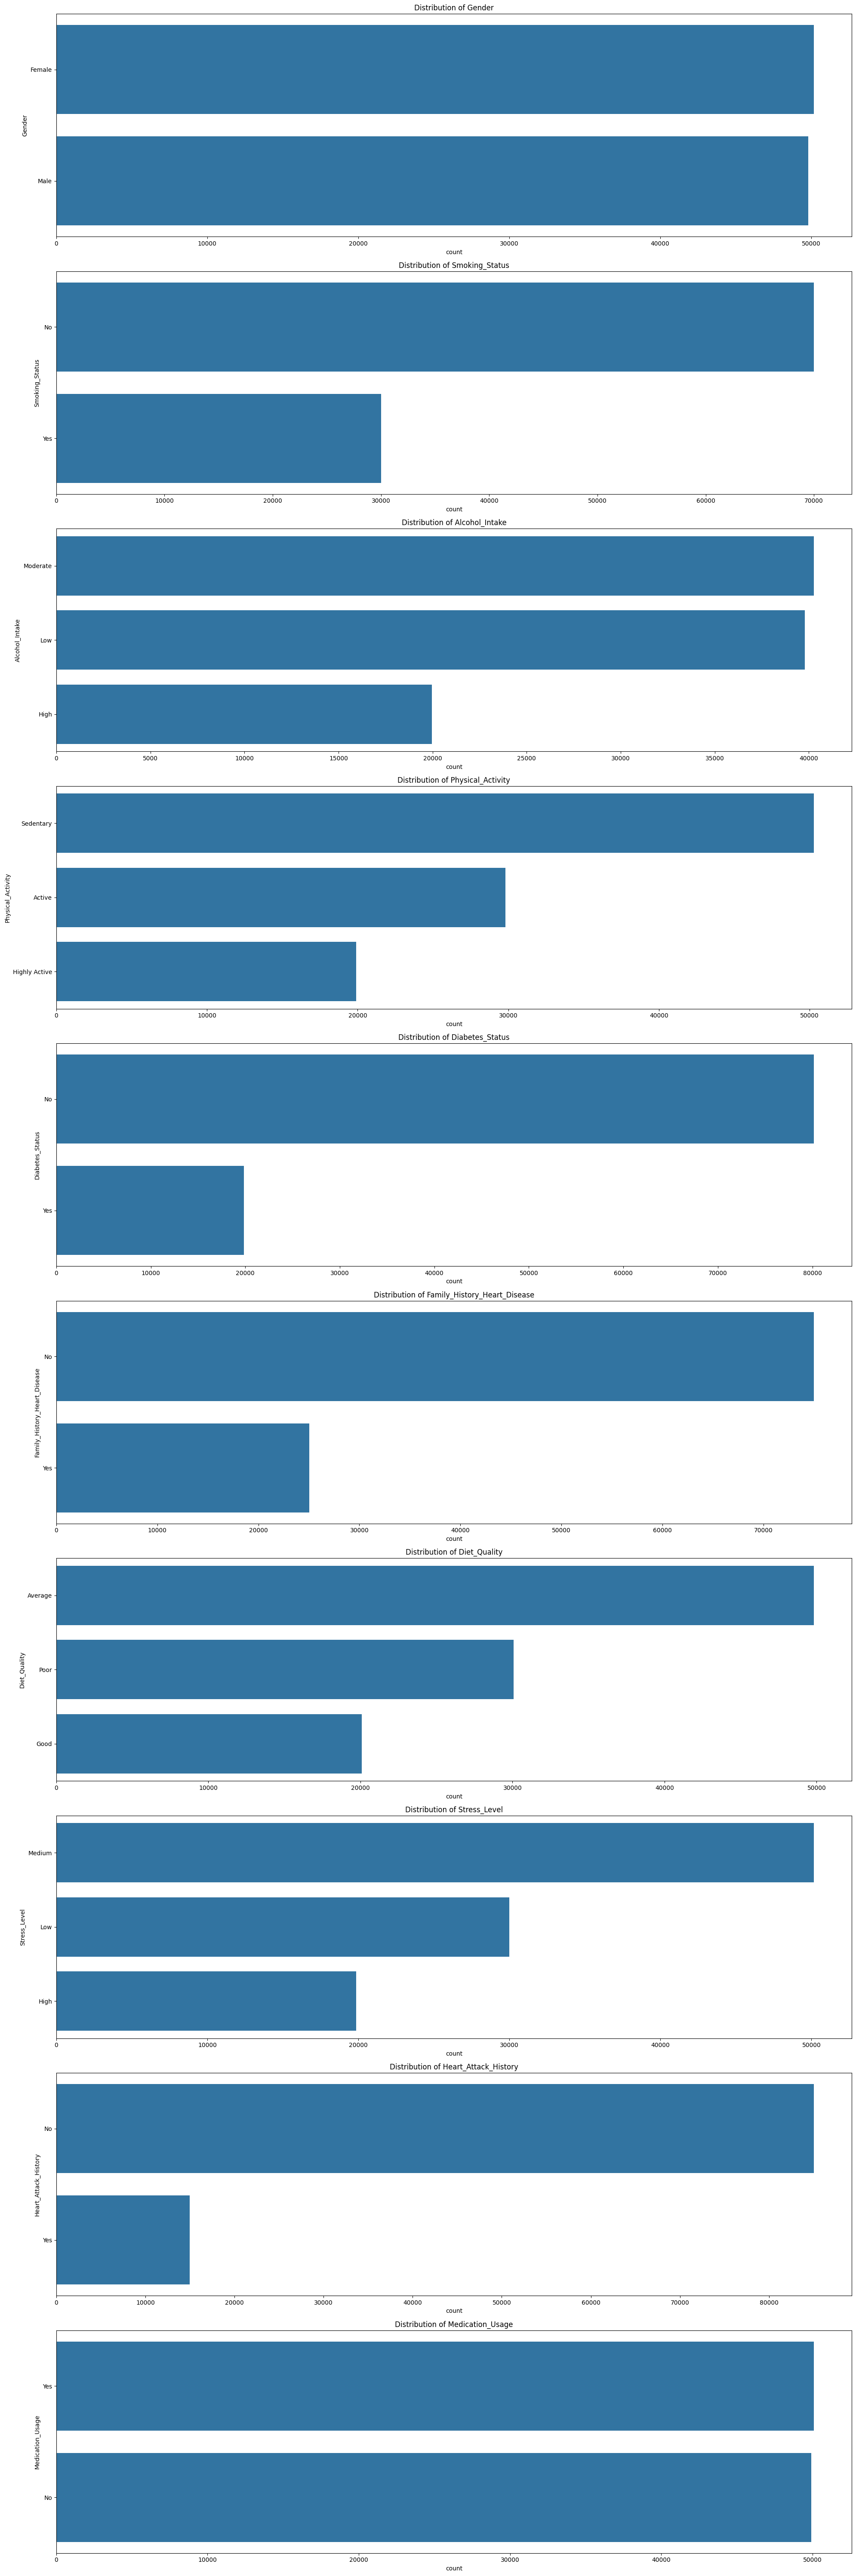

In [ ]:


# Identify columns with object data type
object_columns = hrt_data.select_dtypes(include=['object']).columns

# Create subplots for each categorical feature
plt.figure(figsize=(20, 60))
for i, col in enumerate(object_columns, 1):
    plt.subplot(len(object_columns), 1, i)
    sns.countplot(y=col, data=hrt_data, order=hrt_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


#Correlation and Drop Unimportant Features

In [ ]:
# Checking how some numerical features relate to (correlate with) the target feature(Label)
prep_corr = hrt_data.select_dtypes(include=['int64', 'float64'])
corr_mat =prep_corr.corr()
corr_mat['Heart_Attack_Outcome'].sort_values(ascending=False)

,Heart_Attack_Outcome
Heart_Attack_Outcome,1.000000
Age,0.298683
Obesity_Index,0.296385
Cholesterol_Level,0.283860
Blood_Pressure_Systolic,0.148573
Blood_Pressure_Diastolic,0.140187
LDL_Level,0.003568
Patient_ID,-0.000106
HDL_Level,-0.003492
Triglycerides_Level,-0.003899


This process is done based on the tests of the XGB algorithm(done before) by searching for the best features and keeping them and then deleting the less effective features, as well as the feature that is **least correlated with the target label**.

In [ ]:
"""                                  Feature  Importance
17   cat__Family_History_Heart_Disease_No    0.231707
8                 cat__Smoking_Status_Yes    0.176789
7                  cat__Smoking_Status_No    0.121141
18  cat__Family_History_Heart_Disease_Yes    0.114662
15                cat__Diabetes_Status_No    0.113909
16               cat__Diabetes_Status_Yes    0.087486
4                      num__Obesity_Index    0.040316
0                                num__Age    0.035486
1                  num__Cholesterol_Level    0.027745
3           num__Blood_Pressure_Diastolic    0.016824
2            num__Blood_Pressure_Systolic    0.015103
6                        cat__Gender_Male    0.001292
10                cat__Alcohol_Intake_Low    0.001202
22                 cat__Stress_Level_High    0.001190
14       cat__Physical_Activity_Sedentary    0.001135
21                 cat__Diet_Quality_Poor    0.001106
20                 cat__Diet_Quality_Good    0.001086
19              cat__Diet_Quality_Average    0.001075
26          cat__Heart_Attack_History_Yes    0.001064
12          cat__Physical_Activity_Active    0.001051
23                  cat__Stress_Level_Low    0.001038
25           cat__Heart_Attack_History_No    0.001000
27               cat__Medication_Usage_No    0.000991
11           cat__Alcohol_Intake_Moderate    0.000976
24               cat__Stress_Level_Medium    0.000966
5                      cat__Gender_Female    0.000958
13   cat__Physical_Activity_Highly Active    0.000902
28              cat__Medication_Usage_Yes    0.000902
9                cat__Alcohol_Intake_High    0.000898"""

In [ ]:
#"LDL_Level", "Patient_ID", "HDL_Level", "Triglycerides_Level" are the numerical features.
#"Gender", "Alcohol_Intake", "Diet_Quality", "Stress_Level", "Medication_Usage", "Physical_Activity" are the categorical features.
dropped_col = ["LDL_Level","Patient_ID","HDL_Level","Triglycerides_Level",
               "Gender","Alcohol_Intake","Diet_Quality","Stress_Level","Medication_Usage","Physical_Activity"]

hrt_data.drop(columns=dropped_col,inplace=True, axis=1 )

hrt_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  int64  
 1   Cholesterol_Level             100000 non-null  int64  
 2   Blood_Pressure_Systolic       100000 non-null  int64  
 3   Blood_Pressure_Diastolic      100000 non-null  int64  
 4   Smoking_Status                100000 non-null  object 
 5   Obesity_Index                 100000 non-null  float64
 6   Diabetes_Status               100000 non-null  object 
 7   Family_History_Heart_Disease  100000 non-null  object 
 8   Heart_Attack_History          100000 non-null  object 
 9   Heart_Attack_Outcome          100000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 7.6+ MB


#Preprossing and Preparing the Data

In [ ]:
# Preprocessing libraries
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [ ]:
# Identify categorical columns
categorical_cols = hrt_data.select_dtypes(include=['object']).columns.tolist()

# Numerical columns
numerical_cols = hrt_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Heart_Attack_Outcome')  # drop the target feature(label)



In [ ]:
# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the two pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


In [ ]:
# Separate features and target label
X = hrt_data.drop('Heart_Attack_Outcome', axis=1)
y = hrt_data['Heart_Attack_Outcome']

# Apply preprocessing to features
X_preprocessed = preprocessor.fit_transform(X)


# Handling class imbalance


In [ ]:
#counting the frequency of label
from collections import Counter

# Counting how many times each unique value(0:no heart attack,1:heart attack) appears in y
counter = Counter(y)
print(f'Class Distribution: {counter}')


Class Distribution: Counter({1: 58732, 0: 41268})


In [ ]:
from sklearn.model_selection import train_test_split

#Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE

# Split into original train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
print(f"Train data unbalanced shape: {X_train.shape, y_train.shape}")
print(f"Train data balanced shape: {X_train_balanced.shape, y_train_balanced.shape}")



Train data unbalanced shape: ((80000, 13), (80000,))
Train data balanced shape: ((93972, 13), (93972,))


# Train and Test the Models

#Train and test XGBOOST Classifier Algorithm

In [ ]:
from sklearn.model_selection import  GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [80], #[60,70,80]   The number of decision trees in the model.
    'max_depth':[9], #[8,9]  The maximum depth of each decision tree.
    'learning_rate':[0.1], #[0.1,0.15] adjusting model predictions with each step.
    'subsample': [0.9], #[0.8,0.9]  The fraction of the training data used to build each tree.
    'colsample_bytree': [0.5],#[0.5,0.6] The fraction of features used to build each tree.
    'gamma': [0],#[0, 0.1] A regularization parameter that  controls the minimum loss reduction
    'reg_alpha': [0.15], #[0.15,0.2]  regularization parameter that  helps prevent overfitting by penalizing complex models.
    'reg_lambda':[0] #  regularization parameterthat prevent overfitting
}
#Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9,
# 'n_estimators': 80, 'reg_alpha': 0.15, 'reg_lambda': 0, 'subsample': 0.9}



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #used for cross-validation.


# Add early stopping
xgb_clf = XGBClassifier(
    objective='binary:logistic',# a binary classification problem (heart attack or no heart attack).
    eval_metric='auc',#Uses the Area Under the ROC Curve (AUC) to evaluate the model's performance.
    early_stopping_rounds=50, # stops training if the model's performance doesn't improve for 50 rounds
    use_label_encoder=False,
    random_state=42
)
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',#Uses AUC to evaluate the model's performance during the search.
    cv=skf,#Uses the StratifiedKFold strategy for cross-validation.
    n_jobs=-1, # Uses all available processor cores to speed up the search.
    verbose=2
)

# Fit with validation split
grid_search.fit(
    X_train_balanced, y_train_balanced,
    eval_set=[(X_test, y_test)],  # Monitor validation performance
    verbose=False
)
# Get best parameters
print(f'Best Parameters: {grid_search.best_params_}')
xgb_model = grid_search.best_estimator_




Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 80, 'reg_alpha': 0.15, 'reg_lambda': 0, 'subsample': 0.9}


In [ ]:
#showing the accuracy of the model
accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

                                  Feature  Importance
6                 cat__Smoking_Status_Yes    0.359757
5                  cat__Smoking_Status_No    0.167866
9    cat__Family_History_Heart_Disease_No    0.132136
8                cat__Diabetes_Status_Yes    0.110800
7                 cat__Diabetes_Status_No    0.079370
10  cat__Family_History_Heart_Disease_Yes    0.066231
0                                num__Age    0.029509
1                  num__Cholesterol_Level    0.018686
4                      num__Obesity_Index    0.016180
3           num__Blood_Pressure_Diastolic    0.010661
2            num__Blood_Pressure_Systolic    0.007403
12          cat__Heart_Attack_History_Yes    0.000739
11           cat__Heart_Attack_History_No    0.000662


Training SGDClassifier model

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'loss': ['hinge'],#['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l1'],#['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001], #[0.0001, 0.001, 0.01],
    'learning_rate': ['invscaling'],#['constant', 'optimal', 'invscaling'],
    'eta0': [0.1],# [0.01, 0.1],  # Initial learning rate
    'class_weight': ['balanced'],#[None, 'balanced'],
    'max_iter': [1000],#[1000, 1500]
}
#Best Parameters: {'alpha': 0.0001, 'class_weight': 'balanced', 'eta0': 0.1,
#'learning_rate': 'invscaling', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}

sgd_clf = SGDClassifier(random_state=42)

# Configure grid search with StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=sgd_clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Use AUC for imbalanced data
    cv=skf,
    n_jobs=-1,
    verbose=2
)

# Run grid search on BALANCED training data
grid_search.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

best_sgd = grid_search.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'alpha': 0.0001, 'class_weight': 'balanced', 'eta0': 0.1, 'learning_rate': 'invscaling', 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1'}
Best AUC Score: 0.9533512826089448


In [ ]:

accuracy = accuracy_score(y_test, best_sgd.predict(X_test))
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


Training SVC Model

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_clf.fit(X_train_balanced, y_train_balanced)
accuracy = accuracy_score(y_test, svm_clf.predict(X_test))
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.95


Training Lightgbm Classifier model

In [ ]:
import lightgbm as lgb

# Define the model
lgb_clf = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [200],#[100, 200],
    'max_depth': [5],#[3, 5, 7],
    'learning_rate': [0.01],#[0.01, 0.1],
    'subsample': [0.8],#[0.8, 1.0],
    'colsample_bytree': [0.8],#[0.8, 1.0]
}
#LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=5,
 #              n_estimators=200, n_jobs=-1, random_state=42, subsample=0.8)

grid_search_lgb = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)

best_lgb_model = grid_search_lgb.best_estimator_

best_lgb_model



[LightGBM] [Info] Number of positive: 46986, number of negative: 33014
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.587325 -> initscore=0.352918
[LightGBM] [Info] Start training from score 0.352918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=5,
               n_estimators=200, n_jobs=-1, random_state=42, subsample=0.8)

In [ ]:
# Make predictions on the test set
y_pred = best_lgb_model.predict(X_test)
y_pred_proba = best_lgb_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, best_lgb_model.predict(X_test))
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


#Declaring the Best Classifier chosen Model

In [ ]:
best_model = best_lgb_model

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Heart_Attack_Outcome', 'Heart_Attack_Outcome']))



Classification Report:
                         precision    recall  f1-score   support

No Heart_Attack_Outcome       1.00      0.90      0.95      8254
   Heart_Attack_Outcome       0.94      1.00      0.97     11746

               accuracy                           0.96     20000
              macro avg       0.97      0.95      0.96     20000
           weighted avg       0.96      0.96      0.96     20000



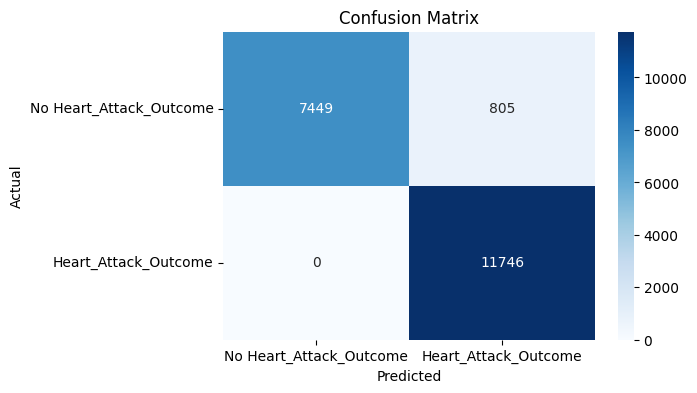

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart_Attack_Outcome', 'Heart_Attack_Outcome'],
            yticklabels=['No Heart_Attack_Outcome', 'Heart_Attack_Outcome'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')


ROC AUC Score: 1.00


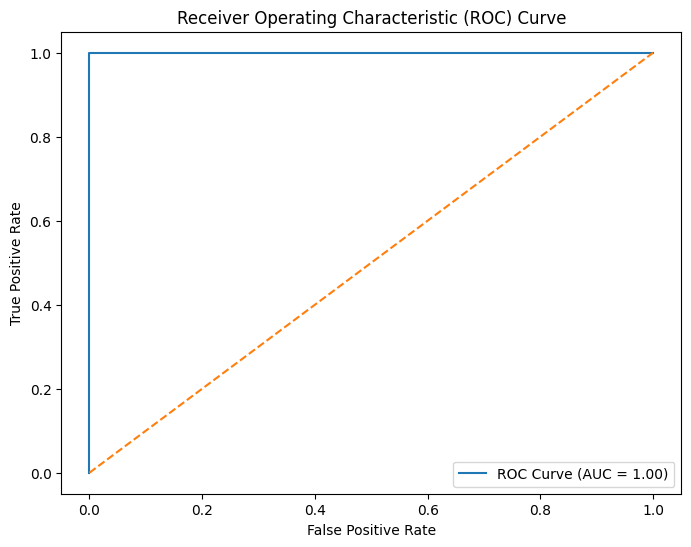

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
full_pipeline_with_clf = Pipeline([
        ("preparation", preprocessor),
        ("model", best_model)
    ])

full_pipeline_with_clf.fit(X, y)
heart_break_classifier_model = full_pipeline_with_clf

[LightGBM] [Info] Number of positive: 58732, number of negative: 41268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.587320 -> initscore=0.352897
[LightGBM] [Info] Start training from score 0.352897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
import joblib
joblib.dump(heart_break_classifier_model, "heart_break_classifier_model.pkl")
load_the_model = joblib.load("heart_break_classifier_model.pkl")
accuracy = accuracy_score(y_test, best_lgb_model.predict(X_test))
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96
